# **Sentinel-1 and Sentinel-2 data fusion through Deep Learning**
![](imgs/fusion_paradigms.png)

In this notebook are presented several Deep Learning models to fuse Sentinel-1 and Sentinel-2 data for Land Cover Mapping. 

More details can be found in our paper [Sebastianelli et al.](https://arxiv.org/abs/2106.11056)

**To re-train the models set the *TRAIN* flaf to *True*.**

**If *TRAIN = False* pre-trained weights will be loaded.**

In [1]:
pip install -r requirements.txt


     ---------------------------------------- 8.9/8.9 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 57.0/57.0 kB ? eta 0:00:00
     ---------------------------------------- 77.4/77.4 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 55.9/55.9 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 554.9/554.9 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 10.1/10.1 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 90.4/90.4 kB 2.5 MB/s eta 0:00:00
  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl (26 kB)
     ---------------------------------------- 62.7/62.7 kB 3.5 MB/s eta 0:00:00
  Using cached entrypoints-0.4-py3-none-any.whl (5.3 kB)
INFO: pip is looking at multiple versions of ypy-websocket to determine which version is compatible with other requirements. This could take a while.
  Using cached uri_template-1.2.0-py3-none-any.whl (10 kB)
  Using cached webencodings-0.5.1-p

In [1]:
TRAIN = True

**Settings**

In [2]:
EPOCHS = 30
BATCH_SIZE = 16

Import libraries

In [3]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Load dataset

The dataset is handeled by the class *DatasetHandler*.

In [4]:
from DatasetHandler import DatasetHandler
training_handler = DatasetHandler('dataset/training')
validation_handler = DatasetHandler('dataset/validation')

In [5]:
print('Dataset classes')
for c in training_handler.classes: print('\t', c)

print('Dataset dimension')
print('\t', len(training_handler.s2_paths), 'training samples belonging to ', len(training_handler.classes), 'classes')
print('\t', len(validation_handler.s2_paths), 'validation samples belonging to ', len(validation_handler.classes), 'classes')

Dataset classes
	 dataset/training\sentinel2\city
	 dataset/training\sentinel2\coastline
	 dataset/training\sentinel2\lake
	 dataset/training\sentinel2\river
	 dataset/training\sentinel2\vegetation
Dataset dimension
	 450 training samples belonging to  5 classes
	 50 validation samples belonging to  5 classes


In [6]:
classes = []
for c in training_handler.classes:
    classes.append(c.split('/')[-1])

# Sentinel-2 classifier

![](imgs/sen2.png)

In [7]:
from CNN_Classifier import CNN_Classifier
s2classifier = CNN_Classifier((64,64, 12), 5)

In [8]:
if TRAIN == True:
    batch_size = BATCH_SIZE
    training_loader = training_handler.s2_data_loader(batch_size, (64,64,12))
    validation_loader = validation_handler.s2_data_loader(batch_size, (64,64,12))
    training_steps = 4*len(training_handler.s2_paths)
    validation_steps = 4*len(validation_handler.s2_paths)
    epochs = EPOCHS
    s2classifier.train_model(epochs, batch_size, training_loader, validation_loader, training_steps, validation_steps)
    s2classifier.model.save('weights/S2-classifier-new.h5')
else:
    s2classifier.model = load_model('weights/S2-classifier-new.h5')

Epoch 1/30
1800/1800 [==============================] - 3217s 2s/step - loss: 1.3793 - accuracy: 0.1980 - val_loss: 0.5012 - val_accuracy: 0.2003
Epoch 2/30
1800/1800 [==============================] - 3042s 2s/step - loss: 0.5108 - accuracy: 0.1928 - val_loss: 0.5006 - val_accuracy: 0.2013
Epoch 3/30
1800/1800 [==============================] - 2943s 2s/step - loss: 0.5034 - accuracy: 0.1911 - val_loss: 0.5004 - val_accuracy: 0.1988
Epoch 4/30
1800/1800 [==============================] - 3232s 2s/step - loss: 0.5011 - accuracy: 0.1878 - val_loss: 0.5004 - val_accuracy: 0.2006
Epoch 5/30
1800/1800 [==============================] - 3686s 2s/step - loss: 0.5012 - accuracy: 0.1791 - val_loss: 0.5004 - val_accuracy: 0.1997
Epoch 6/30
1744/1800 [============================>.] - ETA: 1:44 - loss: 0.5014 - accuracy: 0.1793

# Sentinel-1 Classifier 

![](imgs/sen1.png)

In [ ]:
from CNN_Classifier import CNN_Classifier
s1classifier = CNN_Classifier((64,64, 2), 5)

In [ ]:
if TRAIN == True:
    training_handler = DatasetHandler('dataset/training')
    validation_handler = DatasetHandler('dataset/validation')
    batch_size = BATCH_SIZE
    training_loader = training_handler.s1_data_loader(batch_size, (64,64,2))
    validation_loader = validation_handler.s1_data_loader(batch_size, (64,64,2))
    training_steps = 4*len(training_handler.s1_paths)
    validation_steps = 4*len(validation_handler.s1_paths)
    epochs = EPOCHS
    s1classifier.train_model(epochs, batch_size, training_loader, validation_loader, training_steps, validation_steps)
    s1classifier.model.save('weights/S1-classifier-new.h5')
else:
    s1classifier.model = load_model('weights/S1-classifier-new.h5')

# Early Fusion 


![](imgs/early-fusion.png)

In [ ]:
from CNN_Classifier import CNN_Classifier
earlyclassifier = CNN_Classifier((64,64, 12+2), 5)

In [ ]:
if TRAIN == True:
    batch_size = BATCH_SIZE
    training_loader = training_handler.s2_s1_data_loader_2(batch_size, (64,64,12), (64,64,2))
    validation_loader = validation_handler.s2_s1_data_loader_2(batch_size, (64,64,12), (64,64,2))
    training_steps = 4*len(training_handler.s2_paths)
    validation_steps = 4*len(validation_handler.s2_paths)
    epochs = EPOCHS
    earlyclassifier.train_model(epochs, batch_size, training_loader, validation_loader, training_steps, validation_steps)
    earlyclassifier.model.save('weights/S2-S1-early-classifier-new.h5')
else:
    earlyclassifier.model = load_model('weights/S2-S1-early-classifier-new.h5')

# Joint Fusion

![](imgs/joint-fusion.png)

In [ ]:
from Fusion_Classifier import Fusion_Classifier
fclassifier = Fusion_Classifier((64,64, 12), (64,64,2), 5)

In [ ]:
if TRAIN == True:
    batch_size = BATCH_SIZE
    training_loader = training_handler.s2_s1_data_loader(batch_size, (64,64,12), (64,64,2))
    validation_loader = validation_handler.s2_s1_data_loader(batch_size, (64,64,12), (64,64,2))
    training_steps = 4*len(training_handler.s1_paths)
    validation_steps = 4*len(validation_handler.s1_paths)
    epochs = EPOCHS
    fclassifier.train_model(epochs, batch_size, training_loader, validation_loader, training_steps, validation_steps)
    fclassifier.model.save('weights/S2-S1-classifier-new.h5')
else:
    fclassifier.model = load_model('weights/S2-S1-classifier-new.h5')

# Late Fusion

![](imgs/late-fusion.png)

In [15]:
s2classifier = CNN_Classifier((64,64, 12), 5)
s1classifier = CNN_Classifier((64,64, 2), 5)
s2classifier.model = load_model('weights/S2-classifier-new.h5')
s1classifier.model = load_model('weights/S1-classifier-new.h5')

In [70]:
validation_loader = validation_handler.s2_s1_data_loader(10*len(validation_handler.s1_paths), (64,64,12), (64,64,2))
s2_s1, late_truth = next(iter(validation_loader))
s2_pre = s2classifier.model.predict(s2_s1[0])
s1_pre = s1classifier.model.predict(s2_s1[1])

16/16 [==============================] - 0s 15ms/step


## Mean Late Fusion

In [71]:
late_sum = []
for i in range(s2_pre.shape[0]):
        late_sum.append(np.argmax((s1_pre[i]+s2_pre[i])))

In [72]:
len(late_sum)

500

In [73]:
# g_truth[1]

## Weighted Late Fusion

In [74]:
late_weight = []
w1 = np.array([0, 1, 1, 1, 0])
w2 = 1 - w1

for i in range(s2_pre.shape[0]):
        late_weight.append(np.argmax((w1*s1_pre[i]+w2*s2_pre[i])))

# Results

![](imgs/metrics.png)

# Evaluation

In [93]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
batch_size = BATCH_SIZE
def evaluate_matrix(truth,pred):
    true_labels = ['city','coastline','lake','river','vegetation']
    if np.array(pred).ndim<2:
        conmat = confusion_matrix(truth.argmax(axis=1),np.array(pred))
    else:
        conmat = confusion_matrix(truth.argmax(axis=1),pred.argmax(axis=1))
    sns.heatmap(conmat,annot=True)
    plt.show()
    num_classes = conmat.shape[0]
    res = {'city':[],'coastline':[],'lake':[],'river':[],'vegetation':[]}
    for i in range(num_classes):
        target_class = true_labels[i]
        TP = conmat[i,i]
        FP = np.sum(conmat[:,i]) - TP
        FN = np.sum(conmat[i,:]) - TP
        TN = np.sum(conmat) - TP - FP - FN
        
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        res[target_class].append(accuracy)
        precision = TP / (TP + FP)
        res[target_class].append(precision)
        recall = TP / (TP + FN)
        res[target_class].append(recall)
        f1_score = 2 * precision * recall / (precision + recall)
        res[target_class].append(f1_score)

        #Omission Error
        err = np.delete(cons2[:,i],[i])
        err = np.sum(err)
        err = err/np.sum(cons2[:,i])*100
        res[target_class].append(err)

    df = pd.DataFrame(res,index=['accuracy','precision','recall','f1_score','Omission Error'])
    df['Avg'] = df.mean(axis=1)
    
    return df
        
    

1/1 [==============================] - 0s 79ms/step


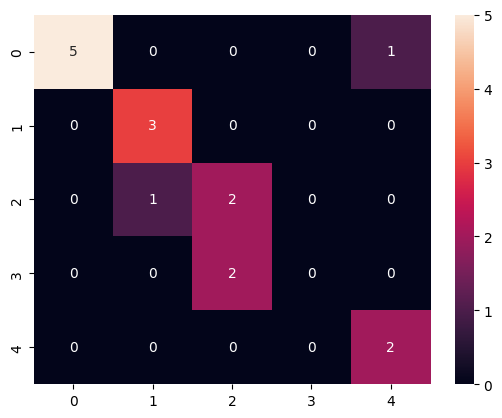

C:\Users\Alvin Buana\AppData\Local\Temp\ipykernel_17984\2489219900.py:24: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = TP / (TP + FP)


,city,coastline,lake,river,vegetation,Avg
accuracy,0.937500,0.937500,0.812500,0.875,0.937500,0.900000
precision,1.000000,0.750000,0.500000,NaN,0.666667,0.729167
recall,0.833333,1.000000,0.666667,0.000,1.000000,0.700000
f1_score,0.909091,0.857143,0.571429,NaN,0.800000,0.784416
Omission Error,0.000000,20.000000,50.000000,25.000,25.000000,24.000000


In [94]:
validation_loader = validation_handler.s2_data_loader(batch_size, (64,64,12))
s2_val, g2_truth = next(iter(validation_loader))
s2_pred = s2classifier.model.predict(s2_val)
dfs2 = evaluate_matrix(g2_truth,s2_pred)
dfs2

1/1 [==============================] - 0s 54ms/step


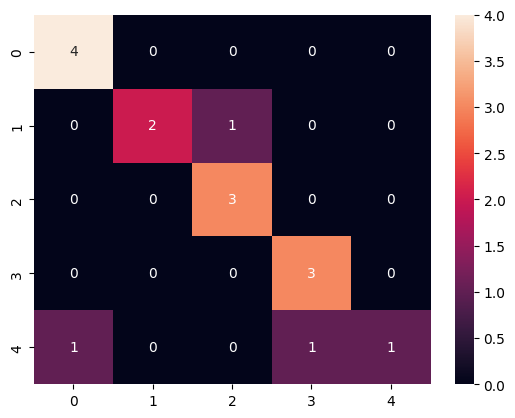

,city,coastline,lake,river,vegetation,Avg
accuracy,0.937500,0.937500,0.937500,0.937500,0.875000,0.925000
precision,0.800000,1.000000,0.750000,0.750000,1.000000,0.860000
recall,1.000000,0.666667,1.000000,1.000000,0.333333,0.800000
f1_score,0.888889,0.800000,0.857143,0.857143,0.500000,0.780635
Omission Error,0.000000,20.000000,50.000000,25.000000,25.000000,24.000000


In [95]:
validation_loader = validation_handler.s1_data_loader(batch_size, (64,64,2))
s1_val, g1_truth = next(iter(validation_loader))
s1_pred = s1classifier.model.predict(s1_val)
dfs1 = evaluate_matrix(g1_truth,s1_pred)
dfs1

1/1 [==============================] - 0s 73ms/step


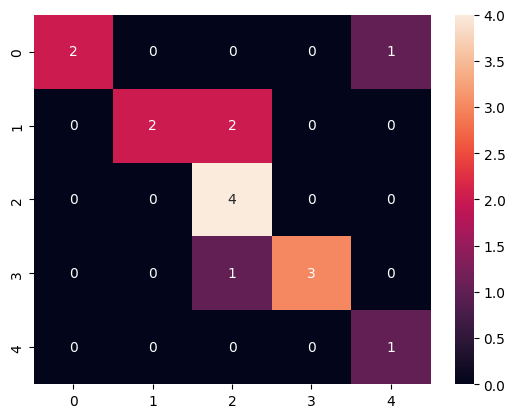

,city,coastline,lake,river,vegetation,Avg
accuracy,0.937500,0.875000,0.812500,0.937500,0.937500,0.900000
precision,1.000000,1.000000,0.571429,1.000000,0.500000,0.814286
recall,0.666667,0.500000,1.000000,0.750000,1.000000,0.783333
f1_score,0.800000,0.666667,0.727273,0.857143,0.666667,0.743550
Omission Error,0.000000,20.000000,50.000000,25.000000,25.000000,24.000000


In [96]:
validation_loader = validation_handler.s2_s1_data_loader_2(batch_size, (64,64,12), (64,64,2))
early_val, early_truth = next(iter(validation_loader))
early_pred = earlyclassifier.model.predict(early_val)
dfse = evaluate_matrix(early_truth,early_pred)
dfse

1/1 [==============================] - 0s 43ms/step


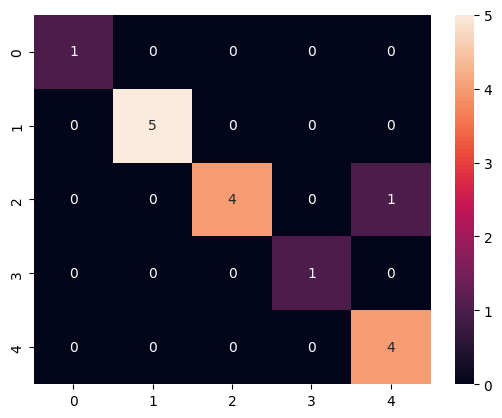

,city,coastline,lake,river,vegetation,Avg
accuracy,1.0,1.0,0.937500,1.0,0.937500,0.975000
precision,1.0,1.0,1.000000,1.0,0.800000,0.960000
recall,1.0,1.0,0.800000,1.0,1.000000,0.960000
f1_score,1.0,1.0,0.888889,1.0,0.888889,0.955556
Omission Error,0.0,20.0,50.000000,25.0,25.000000,24.000000


In [97]:
validation_loader = validation_handler.s2_s1_data_loader(batch_size, (64,64,12), (64,64,2))
joint_val, joint_truth = next(iter(validation_loader))
joint_pred = fclassifier.model.predict(joint_val)
dfsj = evaluate_matrix(joint_truth,joint_pred)
dfsj

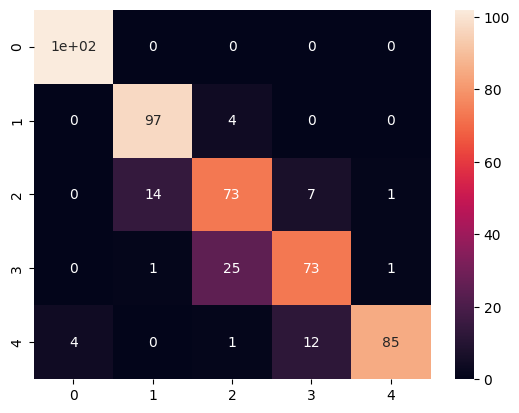

,city,coastline,lake,river,vegetation,Avg
accuracy,0.992000,0.962000,0.896000,0.908000,0.962000,0.944000
precision,0.962264,0.866071,0.708738,0.793478,0.977011,0.861513
recall,1.000000,0.960396,0.768421,0.730000,0.833333,0.858430
f1_score,0.980769,0.910798,0.737374,0.760417,0.899471,0.857766
Omission Error,0.000000,20.000000,50.000000,25.000000,25.000000,24.000000


In [98]:
dfsml = evaluate_matrix(np.array(late_truth),np.array(late_sum))
dfsml

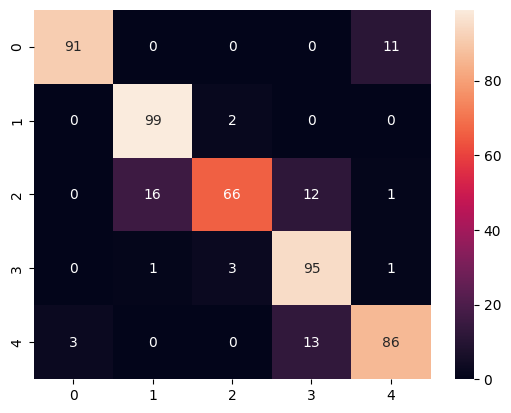

,city,coastline,lake,river,vegetation,Avg
accuracy,0.972000,0.962000,0.932000,0.940000,0.942000,0.949600
precision,0.968085,0.853448,0.929577,0.791667,0.868687,0.882293
recall,0.892157,0.980198,0.694737,0.950000,0.843137,0.872046
f1_score,0.928571,0.912442,0.795181,0.863636,0.855721,0.871110
Omission Error,0.000000,20.000000,50.000000,25.000000,25.000000,24.000000


In [99]:
dfsml = evaluate_matrix(np.array(late_truth),np.array(late_weight))
dfsml